Jupyter Notebook for dataset preprocessing for 'dreamsss' dataset. 

In [2]:
#Import statements
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import math
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, cross_val_score

In [3]:
dreams = pd.read_csv('dreams_dataset.csv')
print(dreams.shape)
dreams.head(10)

(21000, 21)


,dream_id,dreamer,description,dream_date,dream_language,text_dream,characters_code,emotions_code,aggression_code,friendliness_code,...,Male,Animal,Friends,Family,Dead&Imaginary,Aggression/Friendliness,A/CIndex,F/CIndex,S/CIndex,NegativeEmotions
0,1,alta,Alta: a detailed dreamer,1957,en,"The one at the Meads's house, where it's bigge...","2ISA, 1MKA, 1FDA, 1IOA, 2ISA",NaN,2IKA > Q,2IKA 4> Q,...,0.500000,0.000000,0.200000,0.200000,0.0,0.000000,0.200000,0.200000,0.0,0.0
1,2,alta,Alta: a detailed dreamer,8/11/1967,en,I'm at a family reunion in a large fine house ...,"2ISA, people, 2ISA",SD 2IKA,"D > Q, Q > 2ISA",NaN,...,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.666667,0.000000,0.0,1.0
2,3,alta,Alta: a detailed dreamer,8/1/1985,en,I watch a plane fly past and shortly realize i...,"2ISA, 2ISA, 1FSA, 1MBA, 1IOA, 2ISA, 2FDA","SD 1ISA, AP D, AP D","It PRP >, It PRP >, D > 1FKA",NaN,...,0.333333,0.000000,0.000000,0.285714,0.0,1.000000,0.428571,0.000000,0.0,1.0
3,4,alta,Alta: a detailed dreamer,1985?,en,Me pulling the green leaves and berries off so...,"1MAA, 1FMA, 2ISA, 2IKA, 1ANI, 1ANI, 1IOA, 2ISA...","SD 2ISA, SD D","Q > Q, 2ISA > Q, 2ISA > Q, D > 1MSA","1IKA 4> Q, 2ISA 4> 2ISA",...,0.666667,0.176471,0.142857,0.142857,0.0,1.000000,0.235294,0.117647,0.0,1.0
4,5,alta,Alta: a detailed dreamer,1985?,en,I'm in a room that reminds me of (but definite...,"1IRA, 1MSA, 1ISA, 2ISA, 1ISA, 1IKA","AP D, AP D, AP 1MSA, CO D, SD D, AP D","1MSA > D, Q > Q, D > 2IKA, D > 2IKA, D > 1MSA,...",D 4> Q,...,1.000000,0.000000,0.166667,0.166667,0.0,0.875000,1.333333,0.166667,0.0,1.0
5,6,alta,Alta: a detailed dreamer,1985?,en,Living next door to Loretta in an apartment - ...,"1FSA, 2ISA, 1FDA, 1IIC",HA 1FSA,D > 2IKA,NaN,...,0.000000,0.000000,0.000000,0.500000,0.0,1.000000,0.250000,0.000000,0.0,0.0
6,7,alta,Alta: a detailed dreamer,1985?,en,Kidnapped - I'm on my way somewhere else (by c...,"2ISA, 2IOA, 1IOA, 1ISA, 2IKA, 2ISA, 2ISA","AN 1ISA, AN D, SD 2ISA, AN D","Q > 2IKA, D > 2ISA, D > Q, 2IKA > D, D > Q, 1I...",NaN,...,0.000000,0.000000,0.142857,0.000000,0.0,1.000000,1.571429,0.000000,0.0,1.0
7,8,alta,Alta: a detailed dreamer,1985?,en,"I'm alone in an apartment - old place, inside ...","2ISA, 1ISA, 1ISA","AP D, SD D","D > D, 1MSA > D, 1MSA > D, D > 1MSA, D > D, D ...",D 4> D,...,0.000000,0.000000,0.000000,0.000000,0.0,0.888889,2.666667,0.333333,0.0,1.0
8,9,alta,Alta: a detailed dreamer,1985?,en,I'm somewhere with a friend I don't want to be...,"1IKA, stepfather, 1ISB, 1MSA",NaN,D > Q,NaN,...,1.000000,0.000000,0.250000,0.000000,0.0,1.000000,0.250000,0.000000,0.0,0.0
9,10,alta,Alta: a detailed dreamer,1985?,en,"I am in some public place, reminds me of the g...","2ISA, 1MKA",NaN,NaN,NaN,...,1.000000,0.000000,0.500000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0


In [4]:
#Add an additional column 'Gender' for the gender of the dreamser, place it in index 2, intialize with 'n/a'
dreams.insert(2, 'gender', 'n/a')

In [5]:
#Update the gender column to have dreamer gender

dreamer_gender = {
    'alta' : 'F',
    'angie' : 'F',
    'arlie' : 'F',
    'b' : 'F',
    'b2' : 'F',
    'bay_area_girls_456' : 'F',
    'bay_area_girls_789' : 'F',
    'bea1' : 'F',
    'bea2' : 'F',
    'blind-f' : 'F',
    'blind-m' : 'M',
    'bosnak' : 'M',
    'chris' : 'M',
    'chuck' : 'M',
    'dahlia' : 'F',
    'david' : 'M',
    'dorothea' : 'F',
    'ed' : 'M',
    'edna' : 'F',
    'elizabeth' : 'F',
    'emma' : 'F',
    'emmas_husband' : 'M',
    'esther' : 'F',
    'hall_female' : 'F',
    'norms-f' : 'F',
    'izzy' : 'F',
    'jasmine1' : 'F',
    'jasmine2' : 'F',
    'jasmine3' : 'F',
    'jasmine4' : 'F',
    'jeff' : 'M',
    'joan' : 'F',
    'kenneth' : 'M',
    'lawrence' : 'M',
    'mack' : 'M',
    'madeline1-hs' : 'F',
    'madeline2-dorms' : 'F',
    'madeline3-offcampus' : 'F',
    'madeline4-postgrad' : 'F',
    'mark' : 'M',
    'melissa' : 'F',
    'melora' : 'F',
    'melvin' : 'M',
    'merri' : 'F',
    'miami-home' : 'M',
    'miami-lab' : 'M',
    'midwest_teens-f' : 'F',
    'midwest_teens-m' : 'M',
    'nancy' : 'F',
    'natural_scientist' : 'M',
    'norman' : 'M',
    'wedding' : 'F',
    'norms-m' : 'M',
    'pegasus' : 'M',
    'peru-f' : 'f',
    'peru-m' : 'm',
    'phil1' : 'm',
    'phil2' : 'm',
    'phil3' : 'm',
    'physiologist' : 'M',
    'ringo' : 'M',
    'samantha' : 'F',
    'seventh_graders' : 'F',
    'toby' : 'M',
    'tom' : 'M',
    'ucsc_women' : 'F',
    'vickie' : 'F',
    'vietnam_vet' : 'M',
    'vietnam_vet2' : 'M',
    'west_coast_teens' : 'F',
}

for key, val in dreamer_gender.items():
    dreams.loc[dreams['dreamer'] == key, 'gender'] = val

dreams.head(5)


,dream_id,dreamer,gender,description,dream_date,dream_language,text_dream,characters_code,emotions_code,aggression_code,...,Male,Animal,Friends,Family,Dead&Imaginary,Aggression/Friendliness,A/CIndex,F/CIndex,S/CIndex,NegativeEmotions
0,1,alta,F,Alta: a detailed dreamer,1957,en,"The one at the Meads's house, where it's bigge...","2ISA, 1MKA, 1FDA, 1IOA, 2ISA",NaN,2IKA > Q,...,0.500000,0.000000,0.200000,0.200000,0.0,0.000,0.200000,0.200000,0.0,0.0
1,2,alta,F,Alta: a detailed dreamer,8/11/1967,en,I'm at a family reunion in a large fine house ...,"2ISA, people, 2ISA",SD 2IKA,"D > Q, Q > 2ISA",...,0.000000,0.000000,0.000000,0.000000,0.0,1.000,0.666667,0.000000,0.0,1.0
2,3,alta,F,Alta: a detailed dreamer,8/1/1985,en,I watch a plane fly past and shortly realize i...,"2ISA, 2ISA, 1FSA, 1MBA, 1IOA, 2ISA, 2FDA","SD 1ISA, AP D, AP D","It PRP >, It PRP >, D > 1FKA",...,0.333333,0.000000,0.000000,0.285714,0.0,1.000,0.428571,0.000000,0.0,1.0
3,4,alta,F,Alta: a detailed dreamer,1985?,en,Me pulling the green leaves and berries off so...,"1MAA, 1FMA, 2ISA, 2IKA, 1ANI, 1ANI, 1IOA, 2ISA...","SD 2ISA, SD D","Q > Q, 2ISA > Q, 2ISA > Q, D > 1MSA",...,0.666667,0.176471,0.142857,0.142857,0.0,1.000,0.235294,0.117647,0.0,1.0
4,5,alta,F,Alta: a detailed dreamer,1985?,en,I'm in a room that reminds me of (but definite...,"1IRA, 1MSA, 1ISA, 2ISA, 1ISA, 1IKA","AP D, AP D, AP 1MSA, CO D, SD D, AP D","1MSA > D, Q > Q, D > 2IKA, D > 2IKA, D > 1MSA,...",...,1.000000,0.000000,0.166667,0.166667,0.0,0.875,1.333333,0.166667,0.0,1.0


In [6]:
#Split train & test set with 80:20 ratio 

X = dreams.iloc[:, :-1]
y = dreams.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


Proceed to data preprocessing on train set, then reflect changes on test set. 

In [7]:
#Find how many columns are missing values, and how many many missing values
X_train.isna().sum()

 dream_id                      0
dreamer                        0
gender                         0
description                    0
dream_date                     0
dream_language                 0
text_dream                     0
characters_code              373
emotions_code               7966
aggression_code             4456
friendliness_code           7828
sexuality_code             11665
Male                           0
Animal                         0
Friends                        0
Family                         0
Dead&Imaginary                 0
Aggression/Friendliness        0
A/CIndex                       0
F/CIndex                       0
S/CIndex                       0
dtype: int64

In [8]:
#Remove unnecessary columns from the train set
X_train.drop('dream_language', axis=1, inplace=True)
X_train.drop('dream_date', axis=1, inplace=True)

#Remove columns with missing values 
X_train.drop('characters_code', axis=1, inplace=True)
X_train.drop('emotions_code', axis=1, inplace=True)
X_train.drop('aggression_code', axis=1, inplace=True)
X_train.drop('friendliness_code', axis=1, inplace=True)
X_train.drop('sexuality_code', axis=1, inplace=True)
X_train.head(10)

,dream_id,dreamer,gender,description,text_dream,Male,Animal,Friends,Family,Dead&Imaginary,Aggression/Friendliness,A/CIndex,F/CIndex,S/CIndex
15345,19546,madeline3-offcampus,F,Madeline 3: Off-Campus,I dreamt of being in my boyfriend Jeremy's par...,0.500000,0.000000,0.166667,0.250000,0.0,0.833333,0.416667,0.083333,0.083333
8476,10453,emmas_husband,M,Emma's Husband,I am in the desert and a musical gathering is ...,0.750000,0.055556,0.117647,0.176471,0.0,0.500000,0.222222,0.166667,0.111111
9052,11629,hall_female,F,"College women, late 1940s","I dreamed that one of my friends, about a year...",0.000000,0.000000,0.250000,0.000000,0.0,0.500000,0.500000,0.500000,0.000000
17206,21910,norman,M,Norman: a child molester,I was in a carpenter shop. I found some food a...,0.333333,0.000000,0.176471,0.235294,0.0,0.000000,0.000000,0.000000,0.000000
16188,20601,merri,F,Merri: an artist,We were going deep sea fishing. I was suppose ...,0.250000,0.000000,0.142857,0.000000,0.0,1.000000,0.857143,0.142857,0.142857
4475,5085,bay_area_girls_456,F,Bay Area girls: Grades 4-6,I was driving to Capitola with Cori Matthews. ...,1.000000,0.000000,0.250000,0.000000,0.0,1.000000,1.500000,0.000000,0.000000
11744,15433,izzy,F,Izzy (all),I had a boyfriend and we went to a house to ha...,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,1.000000,0.000000,2.000000
6056,7125,dorothea,F,Dorothea: 53 years of dreams,He and I found places together at the table. I...,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000
3755,4326,b2,F,Barb Sanders #2,"(12/12/99)[""The king loves me.""] The King of t...",0.000000,0.000000,0.000000,0.200000,0.0,0.142857,0.400000,1.400000,1.000000
15650,19987,madeline4-postgrad,F,Madeline 4: After College,My friend Ray and I were playing around boxing...,0.600000,0.166667,0.200000,0.300000,0.0,0.625000,0.666667,0.250000,0.000000


In [9]:
X_train.isna().sum()

 dream_id                  0
dreamer                    0
gender                     0
description                0
text_dream                 0
Male                       0
Animal                     0
Friends                    0
Family                     0
Dead&Imaginary             0
Aggression/Friendliness    0
A/CIndex                   0
F/CIndex                   0
S/CIndex                   0
dtype: int64

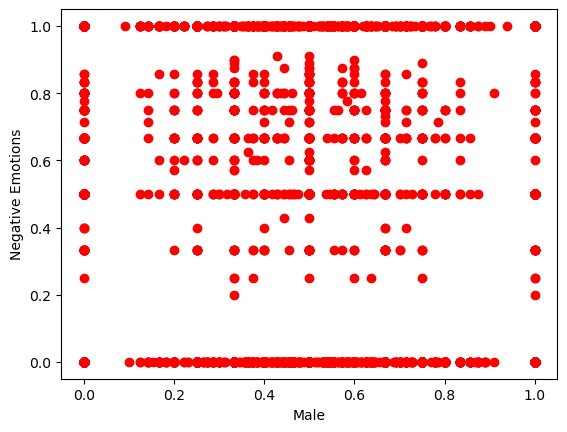

In [124]:
#Data visualization - scatterplot
plt.xlabel("Male")
plt.ylabel("Negative Emotions")
plt.scatter(X_train['Male'], y_train, color = 'red')
plt.show()

                      Male    Animal   Friends    Family  Dead&Imaginary  \
Male              1.000000 -0.056817  0.227725  0.021102       -0.014525   
Animal           -0.056817  1.000000 -0.009965 -0.019507       -0.004948   
Friends           0.227725 -0.009965  1.000000 -0.126890       -0.010402   
Family            0.021102 -0.019507 -0.126890  1.000000       -0.010552   
Dead&Imaginary   -0.014525 -0.004948 -0.010402 -0.010552        1.000000   
NegativeEmotions  0.021532 -0.005626  0.007019  0.026845       -0.010517   

                  NegativeEmotions  
Male                      0.021532  
Animal                   -0.005626  
Friends                   0.007019  
Family                    0.026845  
Dead&Imaginary           -0.010517  
NegativeEmotions          1.000000  


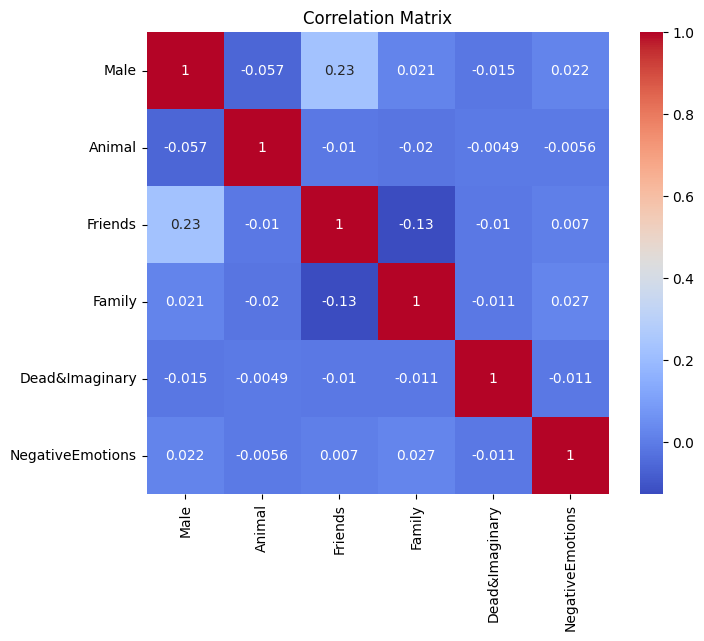

In [13]:
#correlation matrix
selected_columns = dreams[['Male', 'Animal', 'Friends', 'Family', 'Dead&Imaginary', 'NegativeEmotions']]

# Calculate the correlation matrix
correlation_matrix = selected_columns.corr()

# Display the correlation matrix
print(correlation_matrix)

# Visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()